In [ ]:
#student id: 40193577

In [655]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import datetime
%matplotlib inline
import math
import seaborn as sns

In [656]:
original_data = pd.read_excel(r"C:\Users\JENISH SONI\Desktop\Industrial System Analytics\Project_Analytics\A.xlsx", sheet_name = 'Exhibit 1 -- Data')
original_data

,ID,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,...,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
0,1,HS,4.0,4.0,CA,0.0,1.0,A,2011-01-14,2011-01-14,...,K,Elementary,K->Elementary,H,1.0,0.063646,0.936508,4.0,L,1.0
1,2,HC,8.0,8.0,AZ,0.0,7.0,A,2011-01-14,2011-01-21,...,Middle,Middle,Middle->Middle,H,1.0,0.025882,0.880000,3.0,L,1.0
2,3,HD,8.0,8.0,FL,0.0,3.0,A,2011-01-15,2011-01-17,...,Middle,Middle,Middle->Middle,H,1.0,0.025131,0.888889,3.0,L,1.0
3,4,HN,9.0,12.0,VA,1.0,3.0,B,2011-01-15,2011-01-17,...,Undefined,Undefined,Undefined->Undefined,H,0.0,NaN,1.000000,0.0,NaN,0.0
4,5,HD,6.0,8.0,FL,0.0,6.0,T,2011-01-16,2011-01-21,...,Middle,Middle,Middle->Middle,H,0.0,0.112500,0.910112,8.0,M-L,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,2388,HS,4.0,4.0,CA,0.0,1.0,A,2011-06-30,2011-06-30,...,Undefined,Undefined,Undefined->Undefined,H,1.0,NaN,0.941176,1.0,NaN,1.0
2388,2389,HD,8.0,8.0,WA,0.0,6.0,A,2011-06-30,2011-07-05,...,Middle,Middle,Middle->Middle,H,1.0,0.027711,0.884615,3.0,L,1.0
2389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [657]:
c1 = original_data.copy()

In [658]:
c1.shape

(2392, 56)

In [659]:
#checking for , is there any null values in the dataset:
missing_data = pd.DataFrame(
    c1.isnull().sum(),
    columns=['Missing Values'])
missing_data

,Missing Values
ID,2
Program.Code,3
From.Grade,130
To.Grade,153
Group.State,3
Is.Non.Annual.,3
Days,3
Travel.Type,3
Departure.Date,3
Return.Date,3


In [660]:
c1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ID                              2390 non-null   object        
 1   Program.Code                    2389 non-null   object        
 2   From.Grade                      2262 non-null   float64       
 3   To.Grade                        2239 non-null   float64       
 4   Group.State                     2389 non-null   object        
 5   Is.Non.Annual.                  2389 non-null   float64       
 6   Days                            2389 non-null   float64       
 7   Travel.Type                     2389 non-null   object        
 8   Departure.Date                  2389 non-null   datetime64[ns]
 9   Return.Date                     2389 non-null   datetime64[ns]
 10  Deposit.Date                    2389 non-null   datetime64[ns]
 11  Spec

In [661]:
#geting unique values from data
c1.nunique()

ID                                2390
Program.Code                        28
From.Grade                          10
To.Grade                            10
Group.State                         54
Is.Non.Annual.                       2
Days                                12
Travel.Type                          4
Departure.Date                     144
Return.Date                        143
Deposit.Date                       135
Special.Pay                          3
Tuition                           1230
FRP.Active                          93
FRP.Cancelled                       29
FRP.Take.up.percent.               476
Early.RPL                          141
Latest.RPL                         215
Cancelled.Pax                       34
Total.Discount.Pax                  26
Initial.System.Date                296
Poverty.Code                         6
Region                               6
CRM.Segment                         11
School.Type                          4
Parent.Meeting.Flag      

<AxesSubplot:>

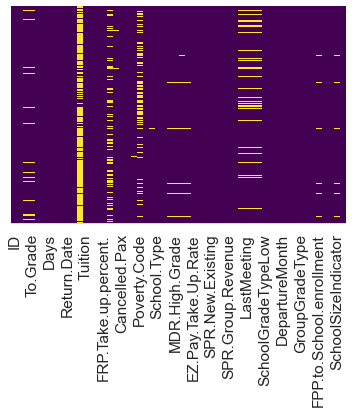

In [662]:
#finding null values through  heatmap
sns.heatmap(c1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

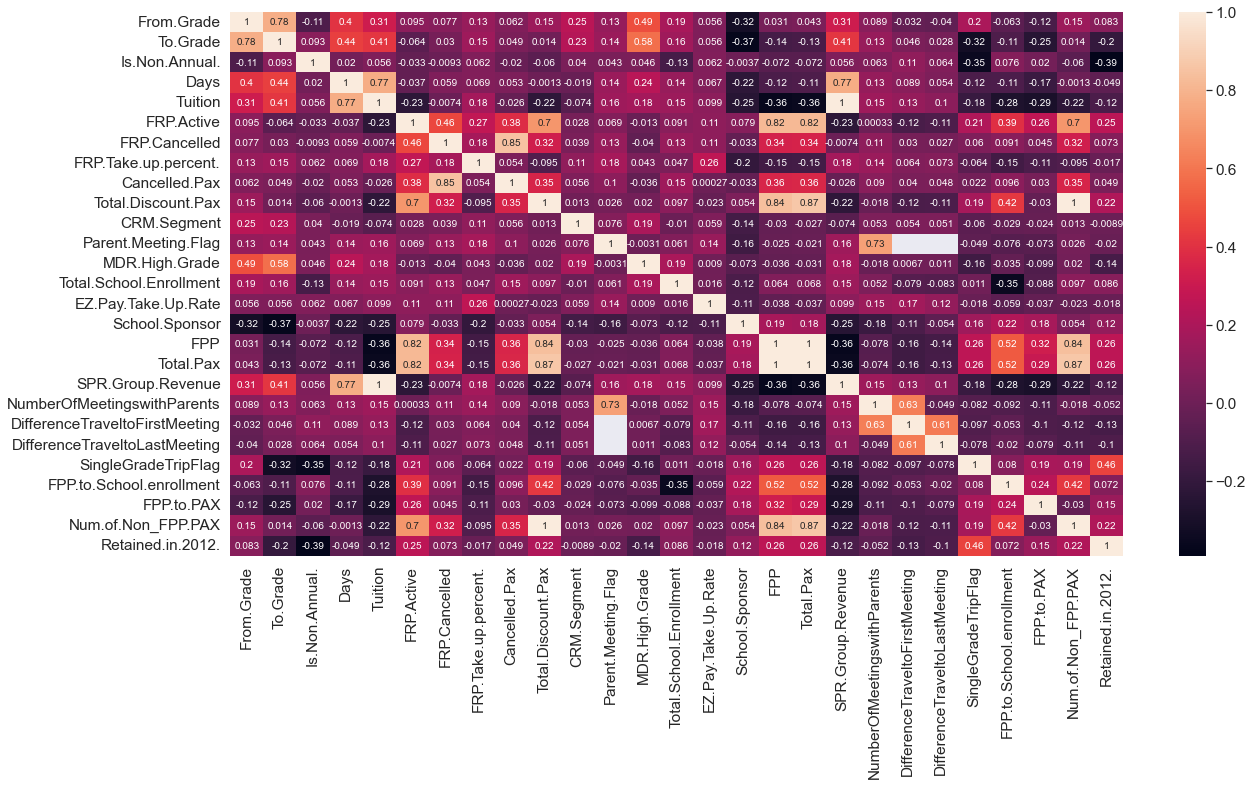

In [663]:
#finding correlation between data
plt.rcParams['figure.figsize'] = (20,10)

sns.heatmap( c1.corr(),annot=True)

<AxesSubplot:xlabel='Retained.in.2012.', ylabel='count'>

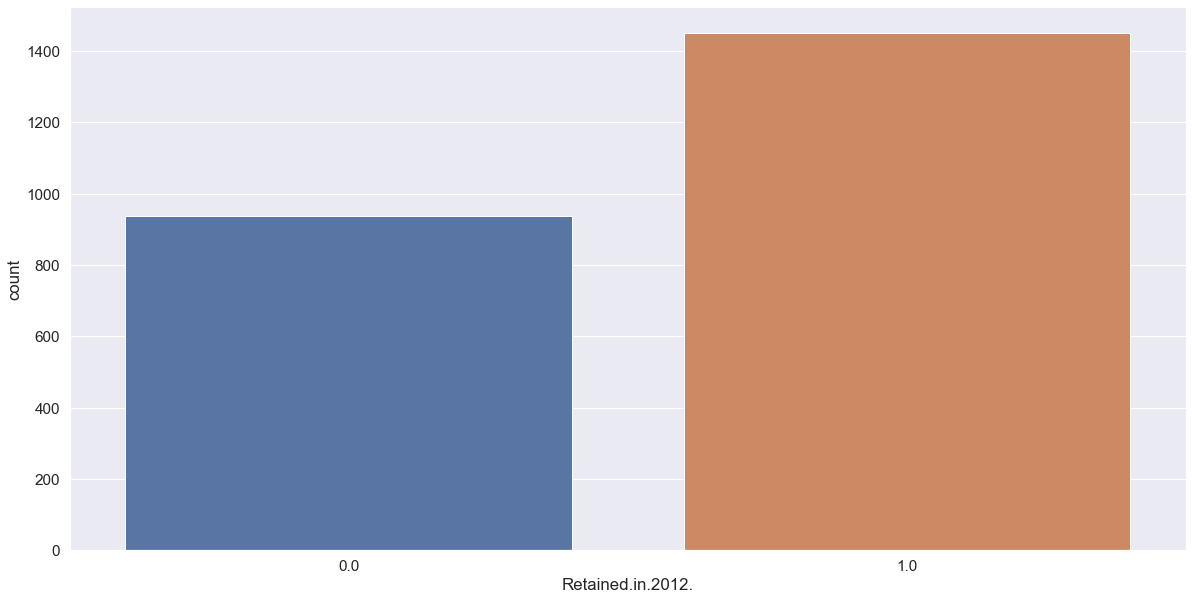

In [664]:
#count plot for retained in 2012
sns.countplot(data=c1, x='Retained.in.2012.')

<AxesSubplot:xlabel='SPR.New.Existing', ylabel='count'>

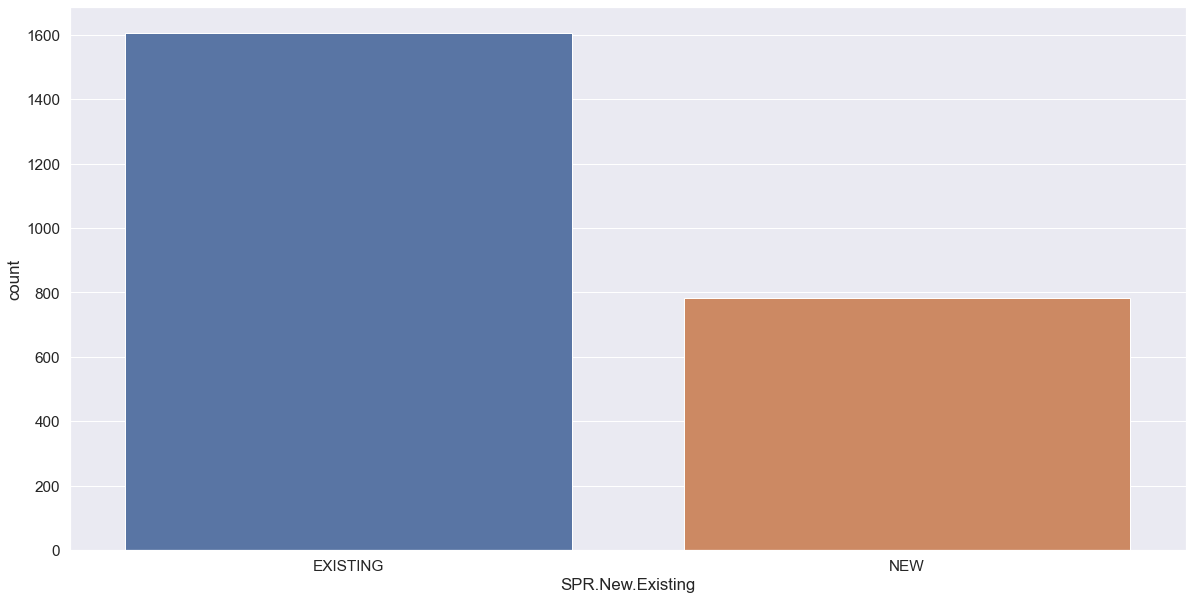

In [665]:
##shows existing and new groups that have traveled with stc mostly a year before in terms of existing...
sns.countplot(data=c1, x='SPR.New.Existing')

<AxesSubplot:>

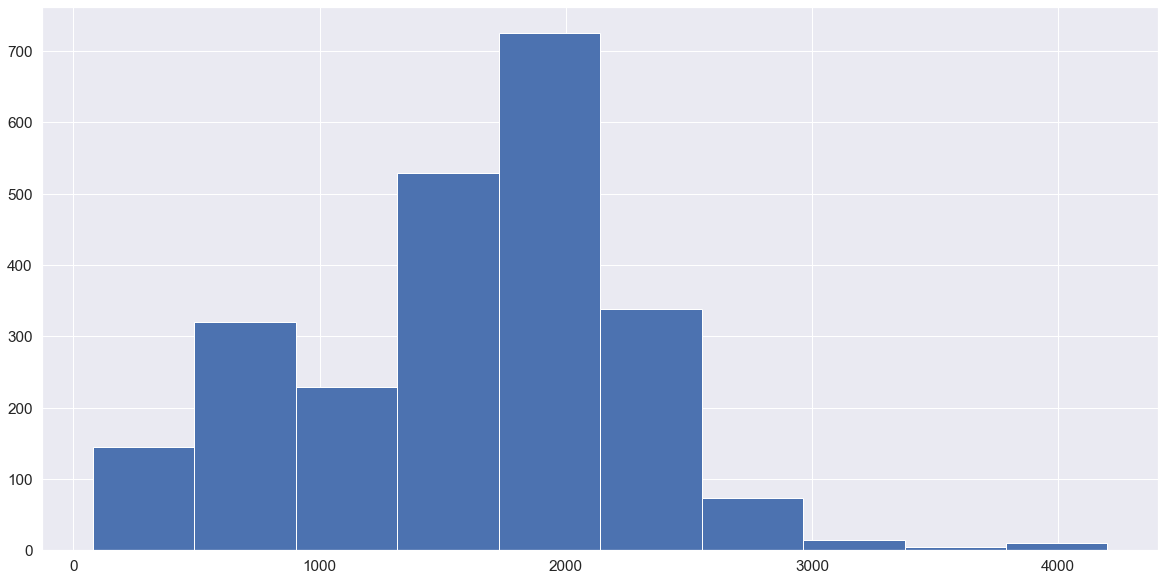

In [666]:
#Histogram of tuition
c1['Tuition'].hist()

#conclusion from below graph  ...#on an average 0-25 people in trip book fot trip cancellation plan....

<AxesSubplot:>

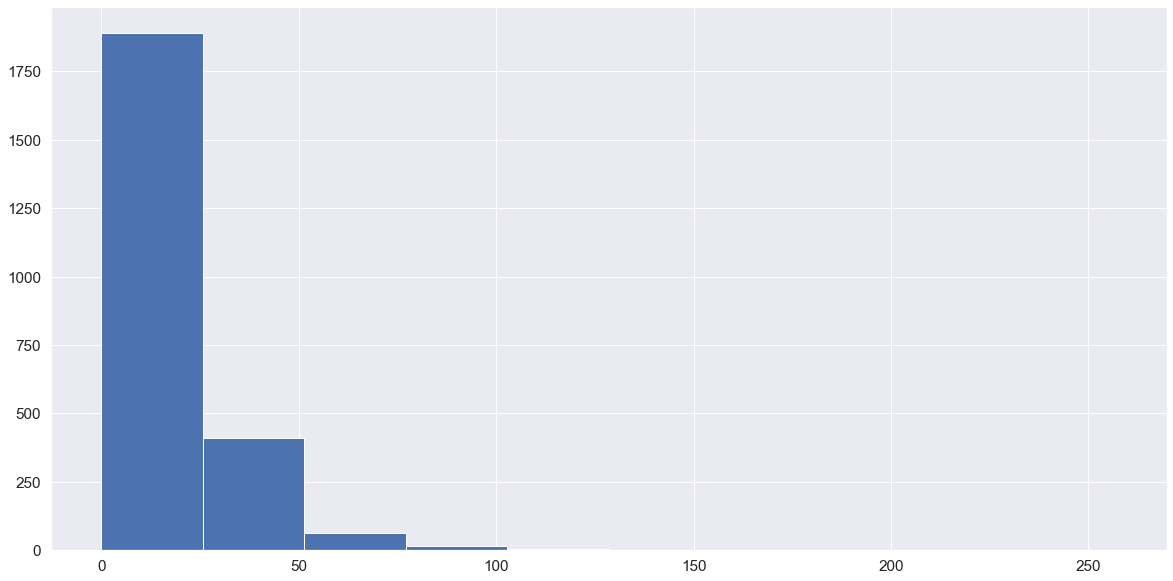

In [667]:
#FRP is the full refund program. This is the number of FPPs on the trip who bought trip-cancellation insurance
c1['FRP.Active'].hist()

#conclusion from bnelow graph.....#which means on an average mostly 5 people in a trip cancell thir insurance after taking insurance.

<AxesSubplot:>

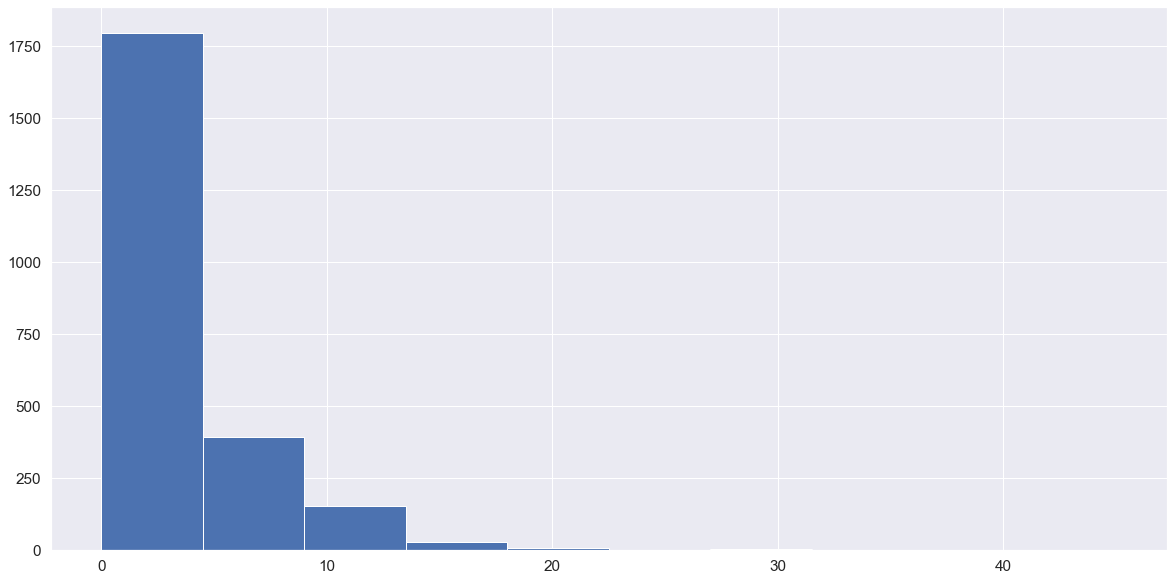

In [668]:
#This is the number of FPPs on the trip who bought trip-cancellation insurance, but then cancelled it
c1['FRP.Cancelled'].hist()

In [669]:
c1.dropna(inplace = True)

In [670]:
categorical_columns = c1.select_dtypes(exclude = 'number').drop('ID', axis = 1).columns
categorical_columns

Index(['Program.Code', 'Group.State', 'Travel.Type', 'Departure.Date',
       'Return.Date', 'Deposit.Date', 'Special.Pay', 'Early.RPL', 'Latest.RPL',
       'Initial.System.Date', 'Poverty.Code', 'Region', 'School.Type',
       'MDR.Low.Grade', 'Income.Level', 'SPR.Product.Type', 'SPR.New.Existing',
       'FirstMeeting', 'LastMeeting', 'SchoolGradeTypeLow',
       'SchoolGradeTypeHigh', 'SchoolGradeType', 'DepartureMonth',
       'GroupGradeTypeLow', 'GroupGradeTypeHigh', 'GroupGradeType',
       'MajorProgramCode', 'SchoolSizeIndicator'],
      dtype='object')

In [671]:
c1['Retained.in.2012. '] = c1['Retained.in.2012.'].astype('object')

In [672]:
from scipy.stats import chi2_contingency

In [673]:
chi2_check = []
for i in categorical_columns:
    if chi2_contingency(pd.crosstab(c1['Retained.in.2012.'], c1[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [categorical_columns, chi2_check] 
             ).T 
res.columns = ['Column', 'Hypothesis']
print(res)

                 Column                      Hypothesis
0          Program.Code  Fail to Reject Null Hypothesis
1           Group.State  Fail to Reject Null Hypothesis
2           Travel.Type  Fail to Reject Null Hypothesis
3        Departure.Date  Fail to Reject Null Hypothesis
4           Return.Date  Fail to Reject Null Hypothesis
5          Deposit.Date  Fail to Reject Null Hypothesis
6           Special.Pay  Fail to Reject Null Hypothesis
7             Early.RPL  Fail to Reject Null Hypothesis
8            Latest.RPL  Fail to Reject Null Hypothesis
9   Initial.System.Date  Fail to Reject Null Hypothesis
10         Poverty.Code  Fail to Reject Null Hypothesis
11               Region  Fail to Reject Null Hypothesis
12          School.Type  Fail to Reject Null Hypothesis
13        MDR.Low.Grade          Reject Null Hypothesis
14         Income.Level  Fail to Reject Null Hypothesis
15     SPR.Product.Type  Fail to Reject Null Hypothesis
16     SPR.New.Existing          Reject Null Hyp

####based on the chiusquared test we are able to know that which columns have important and which are not significantly important....

In [674]:
dataframe_1= original_data[['MDR.Low.Grade','SPR.New.Existing','LastMeeting','SchoolGradeTypeHigh','SchoolGradeType','GroupGradeTypeLow','GroupGradeTypeHigh','GroupGradeType','SchoolSizeIndicator']]

In [675]:
dataframe_1

,MDR.Low.Grade,SPR.New.Existing,LastMeeting,SchoolGradeTypeHigh,SchoolGradeType,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,SchoolSizeIndicator
0,K,EXISTING,2010-08-12,Elementary,Elementary->Elementary,K,Elementary,K->Elementary,L
1,7,EXISTING,2010-08-27,Middle,Middle->Middle,Middle,Middle,Middle->Middle,L
2,6,EXISTING,2010-09-13,Middle,Middle->Middle,Middle,Middle,Middle->Middle,L
3,NaN,EXISTING,NaT,High,High->High,Undefined,Undefined,Undefined->Undefined,NaN
4,6,EXISTING,2010-08-24,Middle,Middle->Middle,Middle,Middle,Middle->Middle,M-L
...,...,...,...,...,...,...,...,...,...
2387,NaN,NEW,2010-09-16,Elementary,Elementary->Elementary,Undefined,Undefined,Undefined->Undefined,NaN
2388,6,EXISTING,2010-09-30,Middle,Middle->Middle,Middle,Middle,Middle->Middle,L
2389,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2390,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [676]:
dataframe_2 = original_data[['FRP.Active','Total.Discount.Pax','FPP','Total.Pax','SingleGradeTripFlag','FPP.to.PAX','Retained.in.2012.']]

# KNN

In [677]:
#new data
#retained columns)(numerical columns)more than 15%
# ( (2).FRP active , (3).Total dicount pax (6).FPP , (7)Total Pax
#,(11).Single grade trip flag
#(12).Fpp to paax
##retained categorical columns....


In [678]:
main_data = pd.concat([dataframe_1, dataframe_2], axis=1, join='inner')
main_data

,MDR.Low.Grade,SPR.New.Existing,LastMeeting,SchoolGradeTypeHigh,SchoolGradeType,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,SchoolSizeIndicator,FRP.Active,Total.Discount.Pax,FPP,Total.Pax,SingleGradeTripFlag,FPP.to.PAX,Retained.in.2012.
0,K,EXISTING,2010-08-12,Elementary,Elementary->Elementary,K,Elementary,K->Elementary,L,25.0,4.0,59.0,63.0,1.0,0.936508,1.0
1,7,EXISTING,2010-08-27,Middle,Middle->Middle,Middle,Middle,Middle->Middle,L,9.0,3.0,22.0,25.0,1.0,0.880000,1.0
2,6,EXISTING,2010-09-13,Middle,Middle->Middle,Middle,Middle,Middle->Middle,L,17.0,3.0,24.0,27.0,1.0,0.888889,1.0
3,NaN,EXISTING,NaT,High,High->High,Undefined,Undefined,Undefined->Undefined,NaN,0.0,0.0,18.0,18.0,0.0,1.000000,0.0
4,6,EXISTING,2010-08-24,Middle,Middle->Middle,Middle,Middle,Middle->Middle,M-L,40.0,8.0,81.0,89.0,0.0,0.910112,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,NaN,NEW,2010-09-16,Elementary,Elementary->Elementary,Undefined,Undefined,Undefined->Undefined,NaN,3.0,1.0,16.0,17.0,1.0,0.941176,1.0
2388,6,EXISTING,2010-09-30,Middle,Middle->Middle,Middle,Middle,Middle->Middle,L,15.0,3.0,23.0,26.0,1.0,0.884615,1.0
2389,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2390,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [679]:
main_data.drop(main_data.tail(3).index,
        inplace = True)
main_data

,MDR.Low.Grade,SPR.New.Existing,LastMeeting,SchoolGradeTypeHigh,SchoolGradeType,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,SchoolSizeIndicator,FRP.Active,Total.Discount.Pax,FPP,Total.Pax,SingleGradeTripFlag,FPP.to.PAX,Retained.in.2012.
0,K,EXISTING,2010-08-12,Elementary,Elementary->Elementary,K,Elementary,K->Elementary,L,25.0,4.0,59.0,63.0,1.0,0.936508,1.0
1,7,EXISTING,2010-08-27,Middle,Middle->Middle,Middle,Middle,Middle->Middle,L,9.0,3.0,22.0,25.0,1.0,0.880000,1.0
2,6,EXISTING,2010-09-13,Middle,Middle->Middle,Middle,Middle,Middle->Middle,L,17.0,3.0,24.0,27.0,1.0,0.888889,1.0
3,NaN,EXISTING,NaT,High,High->High,Undefined,Undefined,Undefined->Undefined,NaN,0.0,0.0,18.0,18.0,0.0,1.000000,0.0
4,6,EXISTING,2010-08-24,Middle,Middle->Middle,Middle,Middle,Middle->Middle,M-L,40.0,8.0,81.0,89.0,0.0,0.910112,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2384,6,EXISTING,NaT,Middle,Middle->Middle,Middle,Middle,Middle->Middle,L,18.0,3.0,35.0,38.0,0.0,0.921053,0.0
2385,K,EXISTING,2010-10-07,Middle,Middle->Middle,K,Middle,K->Middle,S-M,16.0,2.0,20.0,22.0,1.0,0.909091,1.0
2386,NaN,NEW,NaT,High,High->High,Undefined,Undefined,Undefined->Undefined,NaN,0.0,4.0,30.0,34.0,0.0,0.882353,1.0
2387,NaN,NEW,2010-09-16,Elementary,Elementary->Elementary,Undefined,Undefined,Undefined->Undefined,NaN,3.0,1.0,16.0,17.0,1.0,0.941176,1.0


In [680]:
#checking for , is there any null values in the dataset:
missing_data = pd.DataFrame(
    main_data.isnull().sum(),
    columns=['Missing Values'])
missing_data

,Missing Values
MDR.Low.Grade,68
SPR.New.Existing,0
LastMeeting,337
SchoolGradeTypeHigh,0
SchoolGradeType,0
GroupGradeTypeLow,0
GroupGradeTypeHigh,0
GroupGradeType,0
SchoolSizeIndicator,91
FRP.Active,0


In [681]:
mode_Category = main_data['MDR.Low.Grade'].mode()[0]



In [682]:
main_data['MDR.Low.Grade'].fillna(mode_Category,inplace=True)

In [683]:
mode_Category_2 = main_data['SchoolSizeIndicator'].mode()[0]

In [684]:
main_data['SchoolSizeIndicator'].fillna(mode_Category_2,inplace=True)

In [685]:
main_data.drop(columns=['LastMeeting'],inplace=True)

In [686]:
main_data

,MDR.Low.Grade,SPR.New.Existing,SchoolGradeTypeHigh,SchoolGradeType,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,SchoolSizeIndicator,FRP.Active,Total.Discount.Pax,FPP,Total.Pax,SingleGradeTripFlag,FPP.to.PAX,Retained.in.2012.
0,K,EXISTING,Elementary,Elementary->Elementary,K,Elementary,K->Elementary,L,25.0,4.0,59.0,63.0,1.0,0.936508,1.0
1,7,EXISTING,Middle,Middle->Middle,Middle,Middle,Middle->Middle,L,9.0,3.0,22.0,25.0,1.0,0.880000,1.0
2,6,EXISTING,Middle,Middle->Middle,Middle,Middle,Middle->Middle,L,17.0,3.0,24.0,27.0,1.0,0.888889,1.0
3,6,EXISTING,High,High->High,Undefined,Undefined,Undefined->Undefined,S-M,0.0,0.0,18.0,18.0,0.0,1.000000,0.0
4,6,EXISTING,Middle,Middle->Middle,Middle,Middle,Middle->Middle,M-L,40.0,8.0,81.0,89.0,0.0,0.910112,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2384,6,EXISTING,Middle,Middle->Middle,Middle,Middle,Middle->Middle,L,18.0,3.0,35.0,38.0,0.0,0.921053,0.0
2385,K,EXISTING,Middle,Middle->Middle,K,Middle,K->Middle,S-M,16.0,2.0,20.0,22.0,1.0,0.909091,1.0
2386,6,NEW,High,High->High,Undefined,Undefined,Undefined->Undefined,S-M,0.0,4.0,30.0,34.0,0.0,0.882353,1.0
2387,6,NEW,Elementary,Elementary->Elementary,Undefined,Undefined,Undefined->Undefined,S-M,3.0,1.0,16.0,17.0,1.0,0.941176,1.0


In [687]:
#checking for , is there any null values in the dataset:
missing_data = pd.DataFrame(
    main_data.isnull().sum(),
    columns=['Missing Values'])
missing_data

,Missing Values
MDR.Low.Grade,0
SPR.New.Existing,0
SchoolGradeTypeHigh,0
SchoolGradeType,0
GroupGradeTypeLow,0
GroupGradeTypeHigh,0
GroupGradeType,0
SchoolSizeIndicator,0
FRP.Active,0
Total.Discount.Pax,0


In [688]:
from sklearn.preprocessing import LabelEncoder

In [689]:
la_mdr_low_Grade = LabelEncoder()
la_SPR_New_Existing = LabelEncoder()
la_SchoolGradeTypeHigh = LabelEncoder()
la_SchoolGradeType = LabelEncoder()
la_GroupGradeTypeLow = LabelEncoder()
la_GroupGradeTypeHigh = LabelEncoder()
la_GroupGradeType = LabelEncoder()
la_SchoolSizeIndicator = LabelEncoder()

In [690]:
main_data['MDR.Low.Grade']=main_data['MDR.Low.Grade'].astype(str)

In [691]:
main_data['MDR.Low.Grade']=la_mdr_low_Grade.fit_transform(main_data['MDR.Low.Grade'])
main_data['SPR.New.Existing']=la_SPR_New_Existing.fit_transform(main_data['SPR.New.Existing'])
main_data['SchoolGradeTypeHigh']=la_SchoolGradeTypeHigh.fit_transform(main_data['SchoolGradeTypeHigh'])
main_data['SchoolGradeType']=la_SchoolGradeType.fit_transform(main_data['SchoolGradeType'])
main_data['GroupGradeTypeLow']=la_GroupGradeTypeLow.fit_transform(main_data['GroupGradeTypeLow'])
main_data['GroupGradeTypeHigh']=la_GroupGradeTypeHigh.fit_transform(main_data['GroupGradeTypeHigh'])
main_data['GroupGradeType']=la_GroupGradeType.fit_transform(main_data['GroupGradeType'])
main_data['SchoolSizeIndicator']=la_SchoolSizeIndicator.fit_transform(main_data['SchoolSizeIndicator'])

In [692]:
from sklearn.preprocessing import OneHotEncoder

In [693]:
onehotencoder = OneHotEncoder()

In [694]:
onehotencoder.fit_transform(main_data['MDR.Low.Grade'].values.reshape(-1,1)).toarray()
onehotencoder.fit_transform(main_data['SPR.New.Existing'].values.reshape(-1,1)).toarray()
onehotencoder.fit_transform(main_data['SchoolGradeTypeHigh'].values.reshape(-1,1)).toarray()
onehotencoder.fit_transform(main_data['SchoolGradeType'].values.reshape(-1,1)).toarray()
onehotencoder.fit_transform(main_data['GroupGradeTypeLow'].values.reshape(-1,1)).toarray()
onehotencoder.fit_transform(main_data['GroupGradeTypeHigh'].values.reshape(-1,1)).toarray()
onehotencoder.fit_transform(main_data['GroupGradeType'].values.reshape(-1,1)).toarray()
onehotencoder.fit_transform(main_data['SchoolSizeIndicator'].values.reshape(-1,1)).toarray()

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])

In [695]:
main_data

,MDR.Low.Grade,SPR.New.Existing,SchoolGradeTypeHigh,SchoolGradeType,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,SchoolSizeIndicator,FRP.Active,Total.Discount.Pax,FPP,Total.Pax,SingleGradeTripFlag,FPP.to.PAX,Retained.in.2012.
0,10,0,0,0,2,0,4,0,25.0,4.0,59.0,63.0,1.0,0.936508,1.0
1,7,0,2,6,3,2,8,0,9.0,3.0,22.0,25.0,1.0,0.880000,1.0
2,6,0,2,6,3,2,8,0,17.0,3.0,24.0,27.0,1.0,0.888889,1.0
3,6,0,1,4,5,3,12,3,0.0,0.0,18.0,18.0,0.0,1.000000,0.0
4,6,0,2,6,3,2,8,1,40.0,8.0,81.0,89.0,0.0,0.910112,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2384,6,0,2,6,3,2,8,0,18.0,3.0,35.0,38.0,0.0,0.921053,0.0
2385,10,0,2,6,2,2,6,3,16.0,2.0,20.0,22.0,1.0,0.909091,1.0
2386,6,1,1,4,5,3,12,3,0.0,4.0,30.0,34.0,0.0,0.882353,1.0
2387,6,1,0,0,5,3,12,3,3.0,1.0,16.0,17.0,1.0,0.941176,1.0


In [696]:
#Creating x,y for the model and splitting them later....
X = main_data.iloc[:, :-1].values
y = main_data.iloc[:, -1].values

In [697]:
np.shape(X)

(2389, 14)

In [698]:
from sklearn.model_selection import train_test_split


In [699]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=380)

In [700]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [701]:
clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.59      0.52      0.55       242
         1.0       0.70      0.75      0.72       356

    accuracy                           0.66       598
   macro avg       0.64      0.64      0.64       598
weighted avg       0.65      0.66      0.65       598



In [702]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [703]:
import plotly.graph_objects as go
import numpy as np
test_preds = clf.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse


0.5854992438496356

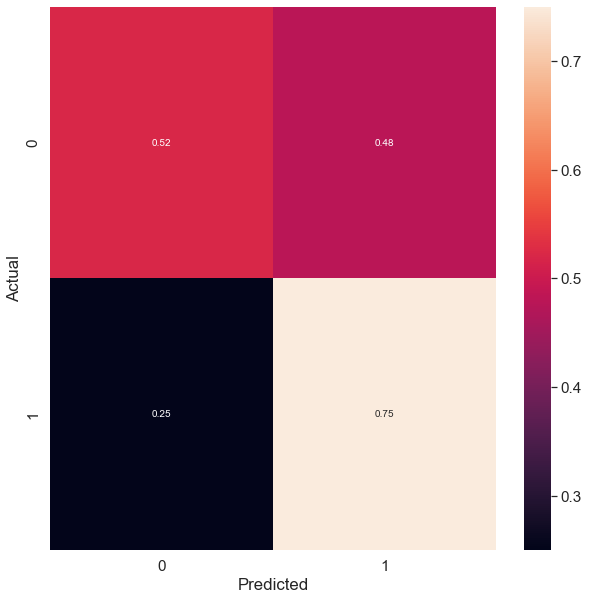

In [704]:
# plt.figure(figsize = (10,2))
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, test_preds) 
# df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
# fig, ax = plt.subplots()
# sns.set(font_scale=1.4)
# sns.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
#            )
# class_names=[0,1]
# tick_marks = np.arange(len(class_names))
# plt.tight_layout()
# plt.title('Confusion matrix\n', y=1.1)
# plt.xticks(tick_marks, class_names)
# plt.yticks(tick_marks, class_names)
# ax.xaxis.set_label_position("top")
# plt.ylabel('Actual label\n')
# plt.xlabel('Predicted label\n');
from sklearn.metrics import confusion_matrix
import seaborn as sns

jn = confusion_matrix(y_test, test_preds)
# Normalise
znn = jn.astype('float') / jn.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(znn, annot=True, fmt='.2f', xticklabels='auto', yticklabels='auto')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

# neural network

In [705]:
from sklearn.neural_network import MLPClassifier
clf= MLPClassifier().fit(X_train, y_train)

D:\New folder\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [706]:
print('The number of output classes: ', clf.n_outputs_)
print('The output classes: ', clf.classes_)
print('The number of layers: ', clf.n_layers_)
print('The number of hidden layers: ', clf.n_layers_ - 2)
print('The length of the coefficients attribute: ', len(clf.coefs_))
print('The shape of the coefficients matrix for the first layer: ', clf.coefs_[0].shape)
print('The shape of the coefficients matrix for the second layer: ', clf.coefs_[1].shape)

The number of output classes:  1
The output classes:  [0. 1.]
The number of layers:  3
The number of hidden layers:  1
The length of the coefficients attribute:  2
The shape of the coefficients matrix for the first layer:  (14, 100)
The shape of the coefficients matrix for the second layer:  (100, 1)


In [707]:
## Your code here
print('Training accuracy: ', round(clf.score(X_train, y_train)*100, 2))
print('Testing accuracy: ', round(clf.score(X_test, y_test)*100, 2))

Training accuracy:  77.67
Testing accuracy:  75.59


In [708]:
y_pred = clf.predict(X_test)

In [709]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)

In [710]:

cnf_matrix = metrics.confusion_matrix(y_test,y_pred)

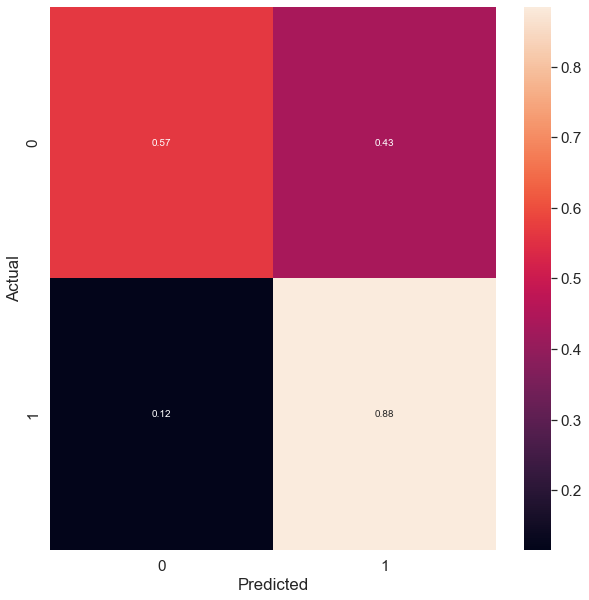

In [711]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels='auto', yticklabels='auto')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)